(35887, 48, 48, 1)
(35887, 7)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_24 (Conv2D)      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


897/897 [==============================] - 13s 14ms/step - loss: 1.8272 - accuracy: 0.2455
Epoch 2/100
897/897 [==============================] - 13s 14ms/step - loss: 1.7756 - accuracy: 0.2619
Epoch 3/100
897/897 [==============================] - 13s 14ms/step - loss: 1.6466 - accuracy: 0.3414
Epoch 4/100
897/897 [==============================] - 13s 14ms/step - loss: 1.5153 - accuracy: 0.4110
Epoch 5/100
897/897 [==============================] - 13s 14ms/step - loss: 1.4202 - accuracy: 0.4534
Epoch 6/100
897/897 [==============================] - 13s 14ms/step - loss: 1.3578 - accuracy: 0.4772
Epoch 7/100
897/897 [==============================] - 12s 14ms/step - loss: 1.3166 - accuracy: 0.4930
Epoch 8/100
897/897 [==============================] - 13s 14ms/step - loss: 1.2899 - accuracy: 0.5090
Epoch 9/100
897/897 [==============================] - 12s 14ms/step - loss: 1.2604 - accuracy: 0.5207
Epoch 10/100
897/897 [==============================] - 12s 14ms/step - loss: 1.2444 

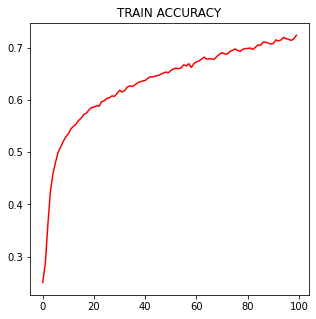

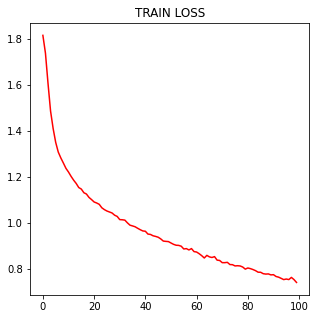

Train loss: 0.5881766080856323
Train accuracy: 78.07655930519104
Test loss: 1.0603652000427246
Test accuracy: 63.638895750045776
[[ 518   13  103   51  149   33  118]
 [  29   55    7    1    6    2    2]
 [ 103    7  453   56  201  110  113]
 [  54    4   49 1504   60   35   59]
 [ 108    4  151   72  636   16  223]
 [  17    0   76   45   22  601   34]
 [  83    3   68  108  189   26  801]]
              precision    recall  f1-score   support

           0       0.57      0.53      0.55       985
           1       0.64      0.54      0.59       102
           2       0.50      0.43      0.46      1043
           3       0.82      0.85      0.84      1765
           4       0.50      0.53      0.51      1210
           5       0.73      0.76      0.74       795
           6       0.59      0.63      0.61      1278

    accuracy                           0.64      7178
   macro avg       0.62      0.61      0.61      7178
weighted avg       0.63      0.64      0.63      7178



'with open("/content/drive/Colab Notebooks/emotionRec/myMoodModel.json", "w") as json_file:\n    json_file.write(model_json)\n# serialize weights to HDF5\nmodel.save_weights("/content/drive/Colab Notebooks/emotionRec/model_weights.h5")\nprint("Saved model to drive")'

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout, Input, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam, Adamax, SGD, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import *
from sklearn.model_selection import *

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/emotionRec/fer2013.csv')
#Convert the 1D array into a 48*48*1 array as input to the model
images = dataset.iloc[:, 1].values
X= []
for image in images:
  each_image = image.split(" ")
  each_image = np.asarray([float(x)/255.0 for x in each_image])
  each_image = np.reshape(each_image, (48,48,1))
  X.append(each_image)
X = np.asarray(X)
print(X.shape)
Y = []
labels = dataset.iloc[:,0].values
from keras.utils import to_categorical
Y=to_categorical(labels)
Y = np.asarray(Y)
print(Y.shape)

#Split into train test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#1st convolution layer
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
 
model.add(Dense(7, activation='softmax'))

print(model.summary())

x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
x_train=x_train.reshape(x_train.shape[0],48,48,1)
x_test=x_test.reshape(x_test.shape[0], 48,48,1)

gen = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)
batch_size=32
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
#early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
obj=Adamax()
model.compile(optimizer=obj,
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

#steps_per_epoch = len(X_train)//batch_size
history=model.fit_generator(train_generator, steps_per_epoch=len(x_train)//batch_size, epochs=100)
# summarize history for accuracy  
   
plt.figure(figsize=(5,5))
accuracy=history.history['accuracy']                      
loss=history.history['loss']

epoch_numbers=range(len(accuracy))
plt.plot(epoch_numbers, accuracy, color='red')
plt.title("TRAIN ACCURACY")
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epoch_numbers, loss, color='red')
plt.title("TRAIN LOSS")
plt.show() 



train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 



test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

predictions = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
 
for i in predictions:
   pred_list.append(np.argmax(i))
 
for i in y_test:
   actual_list.append(np.argmax(i))
 
print(confusion_matrix(actual_list, pred_list))
print(classification_report(actual_list, pred_list))
from keras.models import load_model
model_json = model.to_json()
'''with open("/content/drive/Colab Notebooks/emotionRec/myMoodModel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/Colab Notebooks/emotionRec/model_weights.h5")
print("Saved model to drive")'''


In [2]:
from google.colab import drive
drive.mount('/content/drive') 


Mounted at /content/drive
